In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
data=pd.read_csv("/content/my_movies.csv")
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie=data.iloc[:,5:]
movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [60]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [7]:
# Data Exploration-- Descriptive Statistics

# most popular items
count=movie.iloc[:].sum()
count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [9]:
movie.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 10)

In [16]:
# Top 10 Popular items

count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-9a6d347aca86>:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count.sort_values(0, ascending = False, inplace=True)


,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
# Product Frequency / Total Sales

first = pd.DataFrame(movie.sum() / movie.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [21]:
# Association rules with 10% Support and 30% confidence

# With 10% Support
frequent_itemsets=apriori(movie,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [22]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, Sixth Sense)","(LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [23]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
183,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
126,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
168,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
117,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
118,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [24]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, Sixth Sense)","(LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


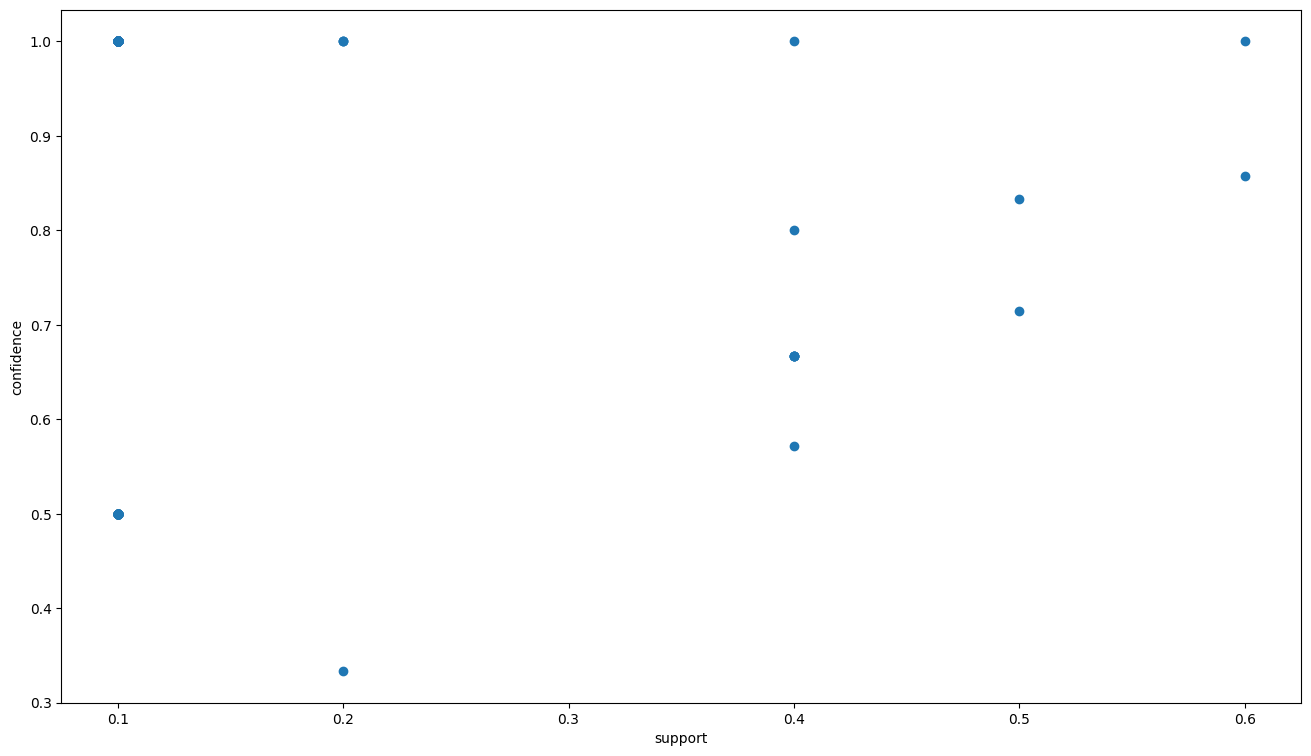

In [25]:
# visualization

plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [26]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)","(Green Mile, Harry Potter1)","(Green Mile, LOTR2)","(Gladiator, Green Mile, Sixth Sense)",(LOTR2),"(LOTR, Gladiator, Sixth Sense)","(Sixth Sense, Harry Potter1, LOTR1)","(Sixth Sense, Harry Potter1, LOTR2)",...,"(Gladiator, Sixth Sense)","(Sixth Sense, LOTR1, LOTR2)","(Gladiator, Patriot)","(Sixth Sense, LOTR1)","(Harry Potter1, Sixth Sense)","(Sixth Sense, LOTR2)","(Green Mile, Sixth Sense)","(LOTR, Sixth Sense)","(Patriot, Sixth Sense)","(LOTR1, Sixth Sense, Harry Potter1, LOTR2)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR1, LOTR2)",NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,2.5,NaN,NaN,NaN
"(LOTR, Gladiator, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,NaN,5.0,NaN,5.0,NaN,2.5,NaN,NaN,NaN,...,NaN,5.0,NaN,5.0,NaN,5.0,2.5,NaN,NaN,NaN
"(LOTR, Gladiator, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Green Mile, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


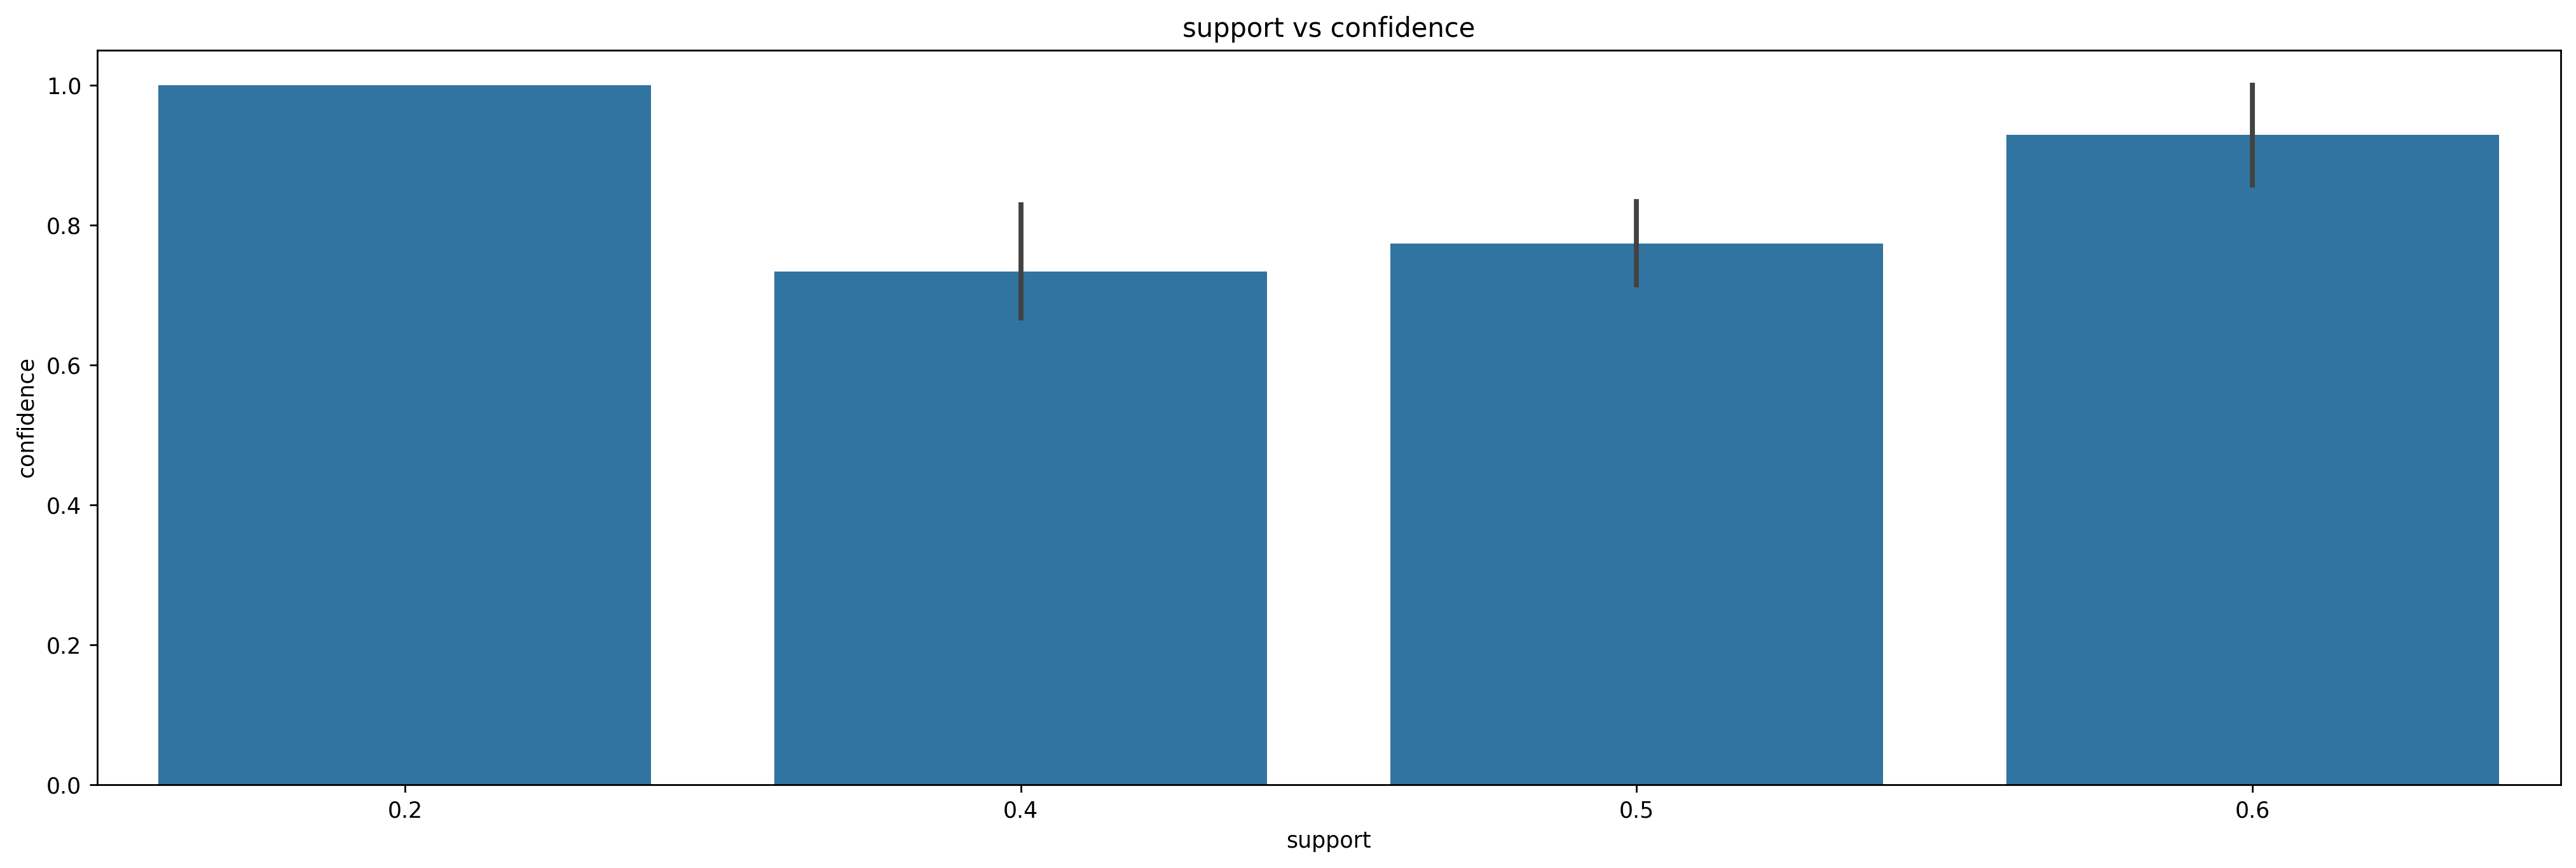

In [59]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(data=lift, x="support", y="confidence")
plt.title("support vs confidence")
plt.show()


In [32]:
# Association rules with 15% Support and 40% confidence
# With 15% Support
frequent_itemsets=apriori(movie,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [33]:
# with 40% Confidence

rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [34]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
12,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
13,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


In [35]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


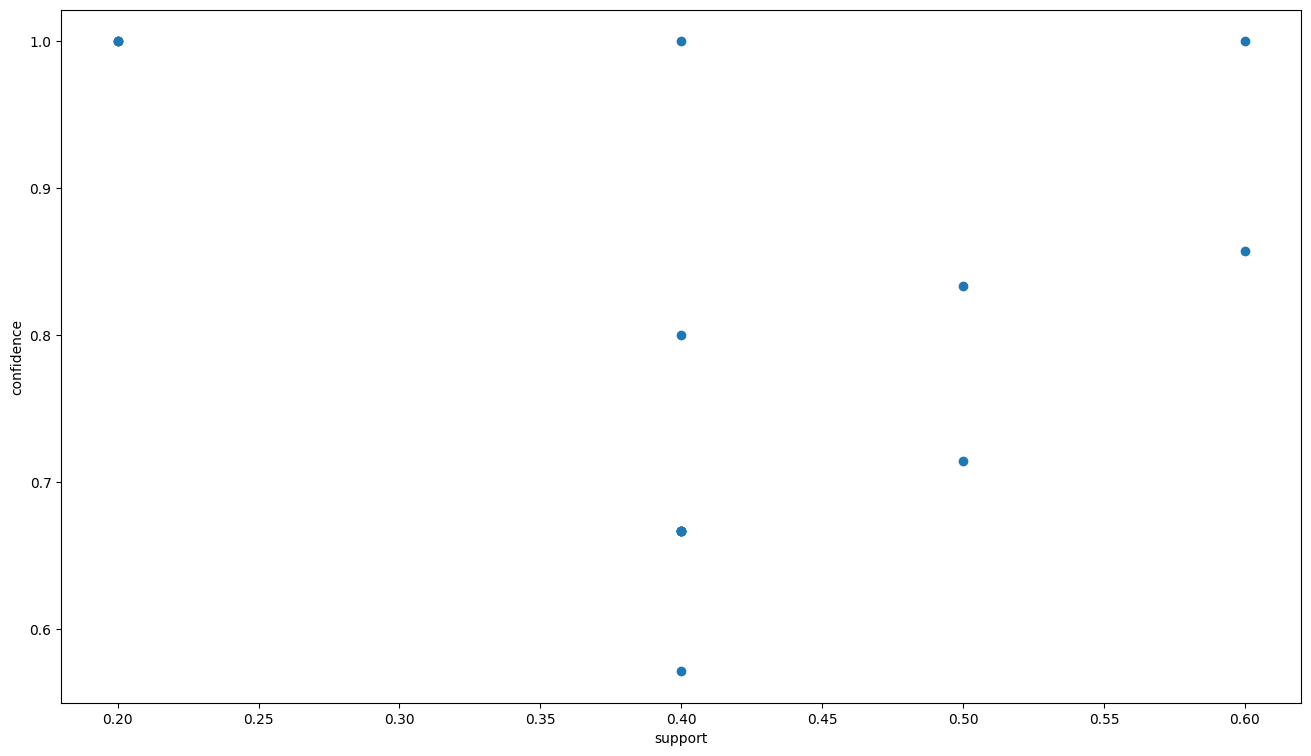

In [36]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [37]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),(Gladiator),(Patriot),(LOTR1),(LOTR2),"(Patriot, Sixth Sense)","(Gladiator, Sixth Sense)","(Gladiator, Patriot)"
antecedents,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,NaN,1.428571,NaN,NaN
(Sixth Sense),NaN,1.190476,1.111111,NaN,NaN,NaN,NaN,1.111111
(Patriot),1.111111,1.428571,NaN,NaN,NaN,NaN,1.333333,NaN
(Green Mile),1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN
"(Patriot, Sixth Sense)",NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(1.5, 0, "frozenset({'Gladiator'})"),
  Text(2.5, 0, "frozenset({'Patriot'})"),
  Text(3.5, 0, "frozenset({'LOTR1'})"),
  Text(4.5, 0, "frozenset({'LOTR2'})"),
  Text(5.5, 0, "frozenset({'Patriot', 'Sixth Sense'})"),
  Text(6.5, 0, "frozenset({'Gladiator', 'Sixth Sense'})"),
  Text(7.5, 0, "frozenset({'Gladiator', 'Patriot'})")])

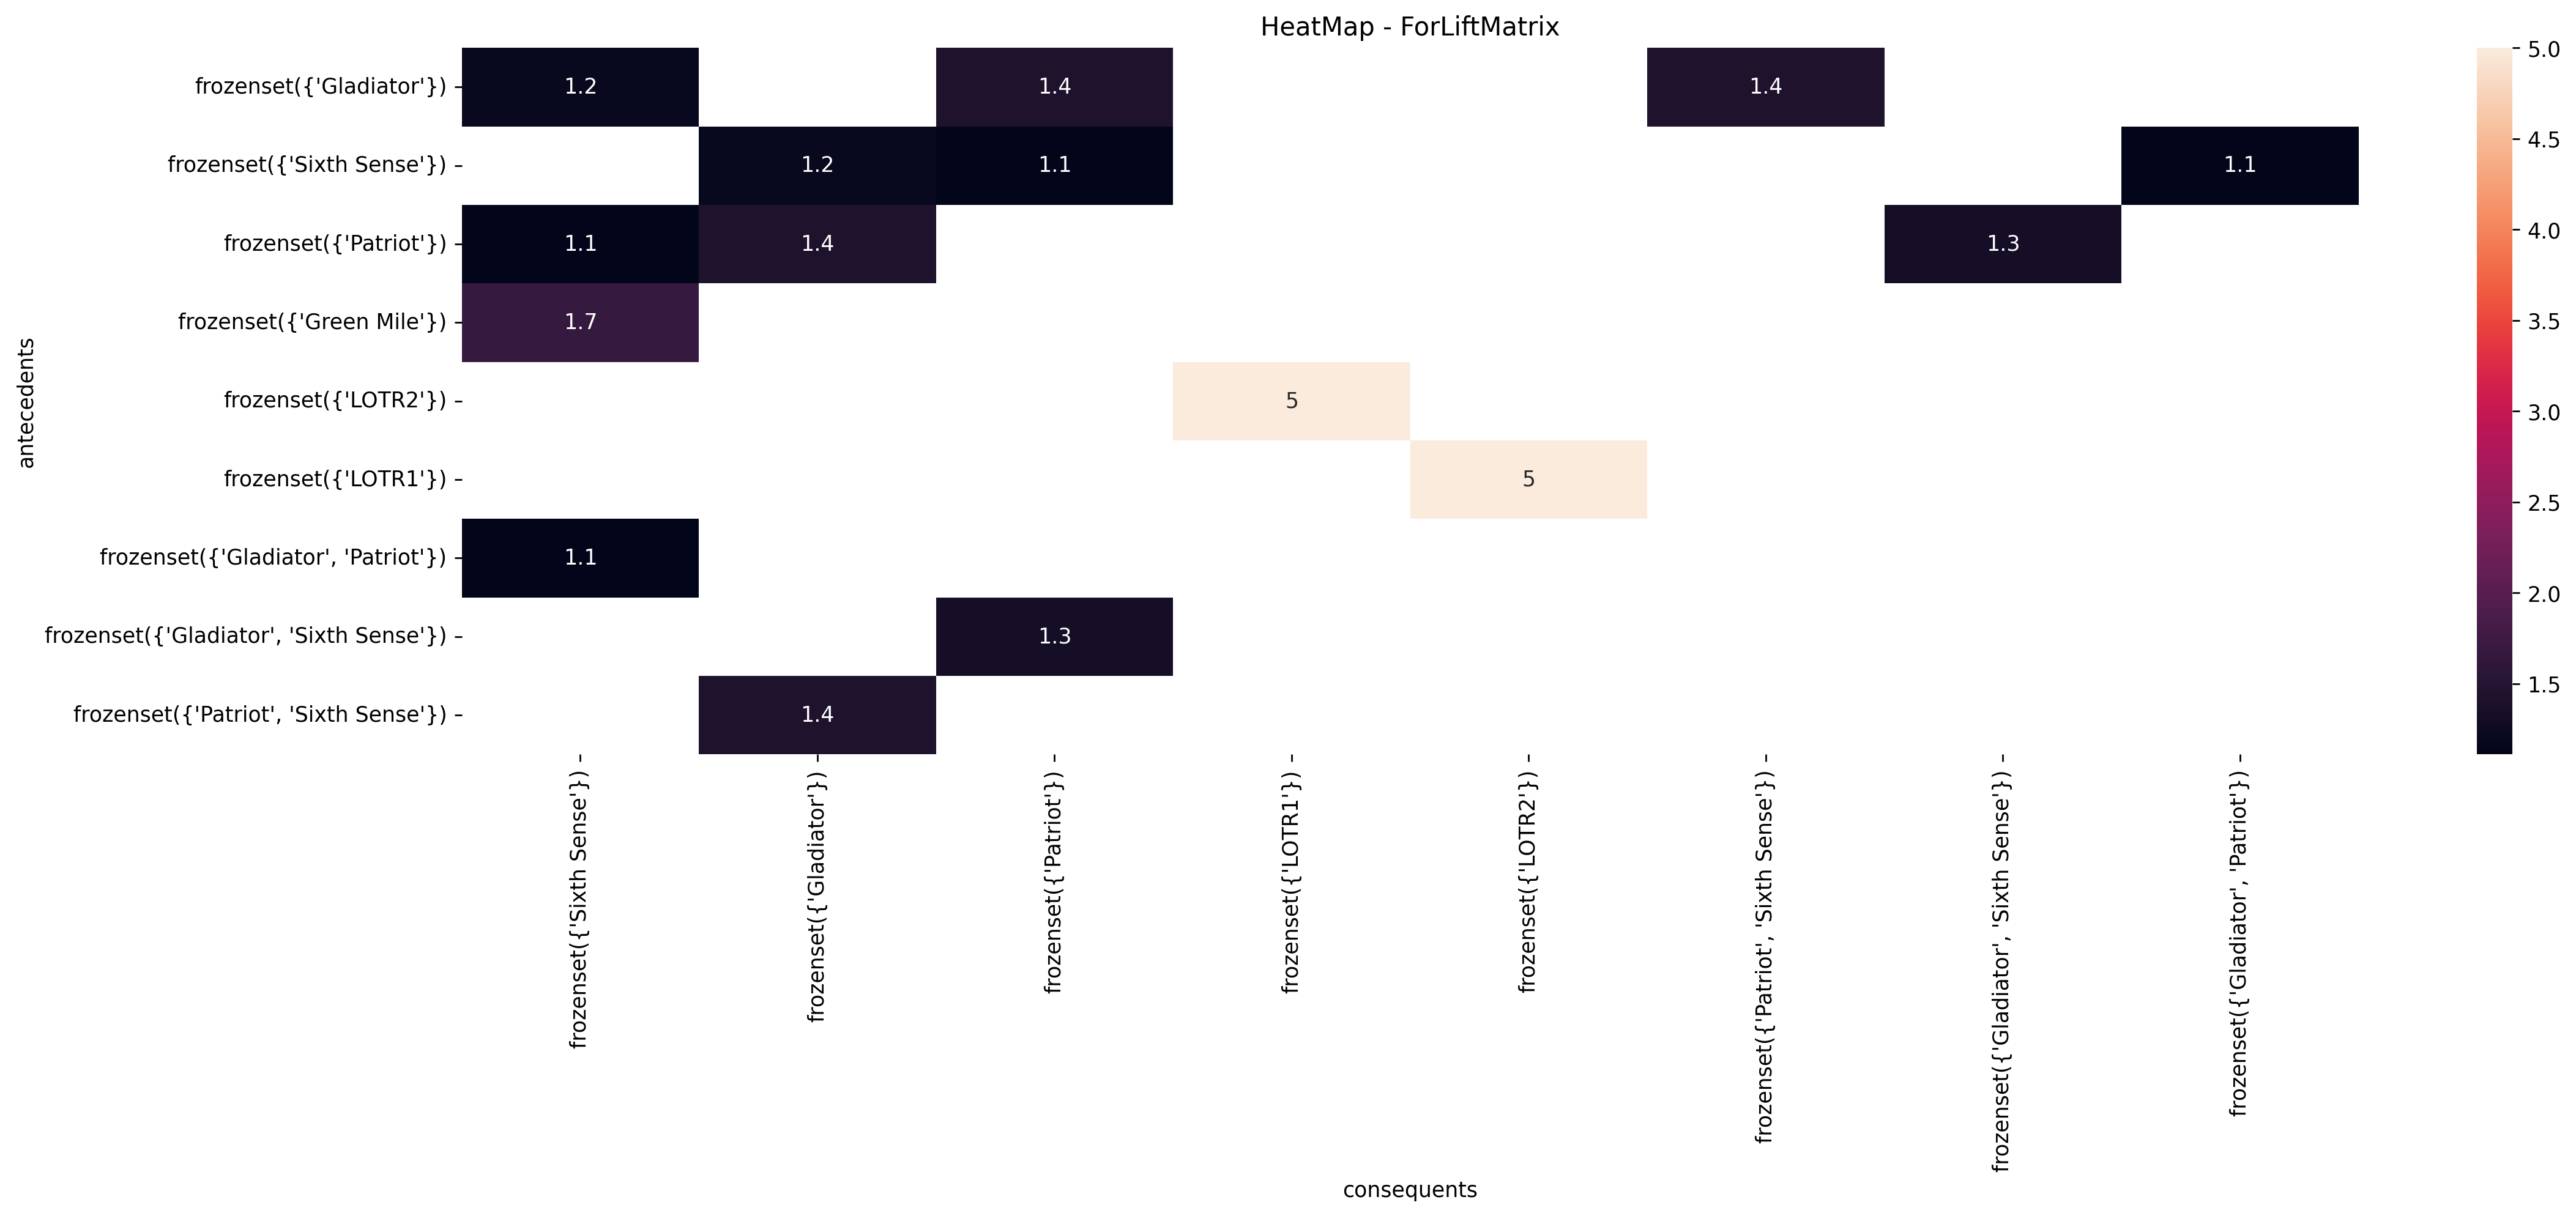

In [38]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [45]:
# Association rules with 20% Support and 60% confidence --With 20% Support

frequent_itemsets=apriori(movie,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [46]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
12,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


In [47]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


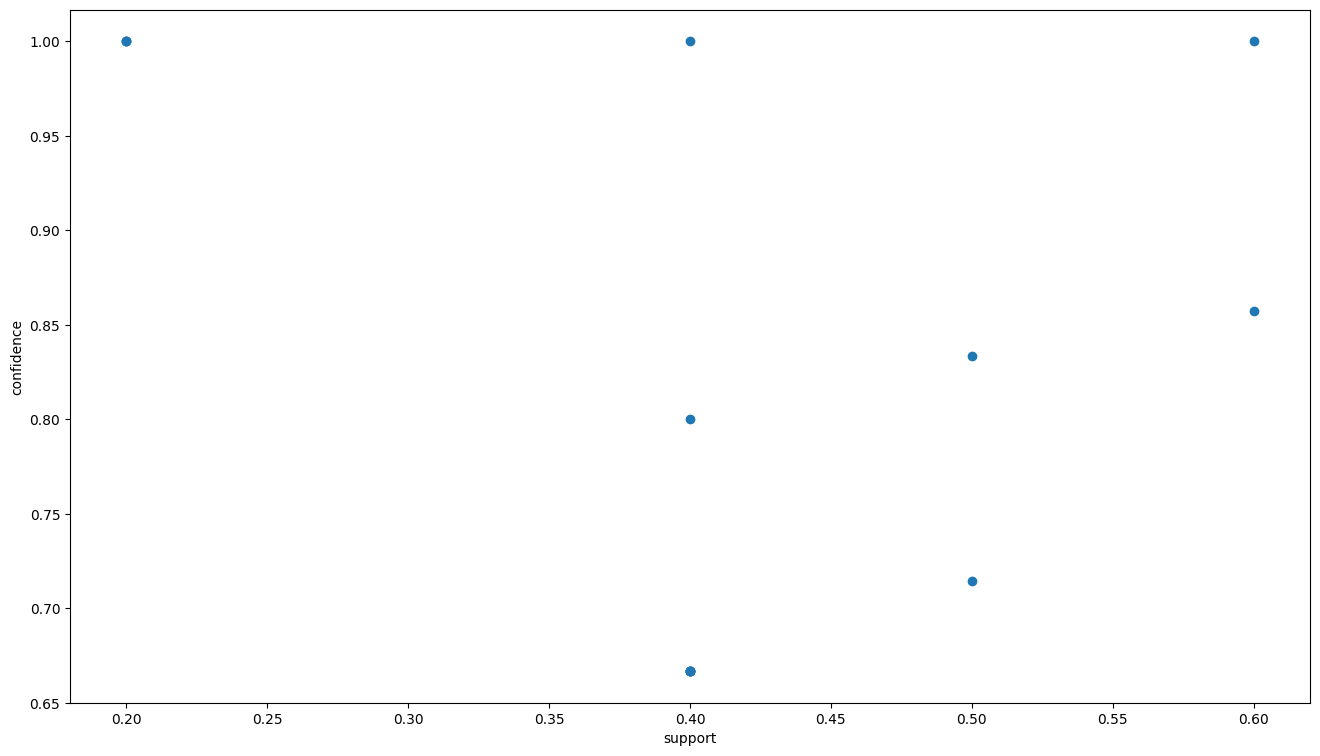

In [48]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [49]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),(Gladiator),(Patriot),(LOTR1),(LOTR2),"(Gladiator, Sixth Sense)","(Gladiator, Patriot)"
antecedents,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,NaN,NaN,NaN
(Sixth Sense),NaN,1.190476,1.111111,NaN,NaN,NaN,1.111111
(Patriot),1.111111,1.428571,NaN,NaN,NaN,1.333333,NaN
(Green Mile),1.666667,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,5.0,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0,NaN,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN
"(Patriot, Sixth Sense)",NaN,1.428571,NaN,NaN,NaN,NaN,NaN


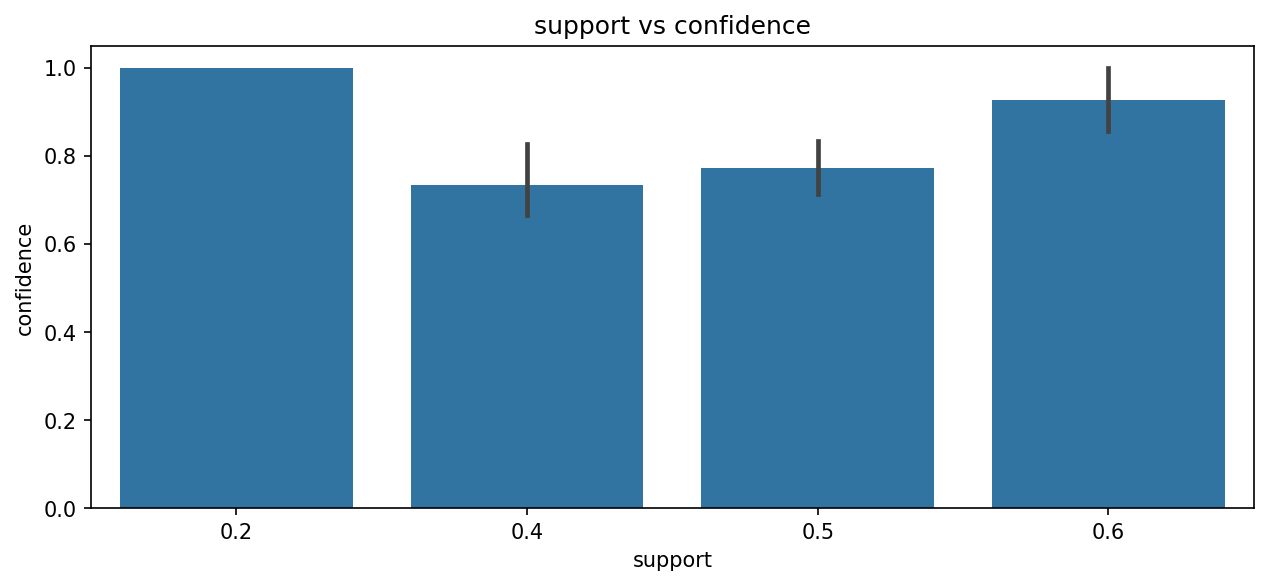

In [58]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(data=lift, x="support", y="confidence")
plt.title("support vs confidence")
plt.show()
